## Importation des modules

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Collecte des données 

In [118]:
# Collecte des données
file_name = 'data_sales.csv'
data = pd.DataFrame()
data = pd.read_csv(file_name, sep=';')

In [119]:
data.head()

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,NaN,NaN,BATTERIE 45 AMP,1,60,60
2,NaN,NaN,COUSSINETS BIELLE 3E/5E,1,15,15
3,NaN,NaN,RETIEN D'HUILE 5AF,1,5,5
4,NaN,NaN,HUILE CITROL SAE 50 5L,6,"8,67","52,02"


In [120]:
data.dtypes

code_vente                float64
date_vente                 object
nom_de_la_piece            object
quantite                    int64
prix_unitaire_de_vente     object
prix_total_de_vente        object
dtype: object

## Nettoyage des données et Préparation des données

In [121]:
data.isnull().sum()

code_vente                2910
date_vente                2595
nom_de_la_piece              0
quantite                     0
prix_unitaire_de_vente       0
prix_total_de_vente          0
dtype: int64

In [122]:
data

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,NaN,NaN,BATTERIE 45 AMP,1,60,60
2,NaN,NaN,COUSSINETS BIELLE 3E/5E,1,15,15
3,NaN,NaN,RETIEN D'HUILE 5AF,1,5,5
4,NaN,NaN,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
...,...,...,...,...,...,...
2905,NaN,NaN,FILTRE A AIR L/C (61030),1,15,15
2906,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2907,NaN,NaN,HUILE CALTEX HAVOLINE 4L,1,20,20
2908,NaN,NaN,HUILE CALTEX HAVOLINE 4L,1,20,20


In [123]:
try:
    if np.isnan(data.at[1, 'date_vente']):
        print(True)
except:
    print(False)

True


In [124]:
def jour(date):
    return date.split('/')[0]

def mois(date):
    return date.split('/')[1]

def annee(date):
    return date.split('/')[2]

order_number = 0
first_date = data.loc[0, 'date_vente']
current_day = first_date.split('/')[0]

def code_vente_generator(date):
    date_seq = date.split('/')
    day = date_seq[0]
    month = date_seq[1]
    year = date_seq[2]
    global order_number
    global current_day
    order_number = 1 if current_day != day else order_number + 1
    current_day = day if current_day != day else current_day
    code_operation = day + month + year + '/' + str(order_number)
    return code_operation

current_date = first_date

def date_remplissage(date):
    global current_date
    try: 
        if np.isnan(date):
            date_set = current_date
    except:
        current_date = date
        date_set = current_date
    return date_set

In [125]:
data['date_vente'] = data['date_vente'].apply(date_remplissage)
data

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,NaN,08/12/2021,BATTERIE 45 AMP,1,60,60
2,NaN,08/12/2021,COUSSINETS BIELLE 3E/5E,1,15,15
3,NaN,08/12/2021,RETIEN D'HUILE 5AF,1,5,5
4,NaN,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
...,...,...,...,...,...,...
2905,NaN,30/12/2022,FILTRE A AIR L/C (61030),1,15,15
2906,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2907,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2908,NaN,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20


In [126]:
# data['date_vente'] = pd.to_datetime(data['date_vente'])
# data['date_vente'] = pd.to_datetime(data['date_vente'], format='%A %d %B %Y')
# data['date_vente'] = data['date_vente'].str.extract(f'(\d{1,2} \w+ \d{4})')[0]
# data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d %B %Y')
# data['date_vente'] = pd.to_datetime(data['date_vente'], errors='coerce')

data['code_vente'] = data['date_vente'].apply(code_vente_generator)
data


,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
0,08122021/1,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
1,08122021/2,08/12/2021,BATTERIE 45 AMP,1,60,60
2,08122021/3,08/12/2021,COUSSINETS BIELLE 3E/5E,1,15,15
3,08122021/4,08/12/2021,RETIEN D'HUILE 5AF,1,5,5
4,08122021/5,08/12/2021,HUILE CITROL SAE 50 5L,6,"8,67","52,02"
...,...,...,...,...,...,...
2905,30122022/8,30/12/2022,FILTRE A AIR L/C (61030),1,15,15
2906,31122022/1,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2907,31122022/2,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20
2908,31122022/3,31/12/2022,HUILE CALTEX HAVOLINE 4L,1,20,20


In [127]:
data.isnull().sum()

code_vente                0
date_vente                0
nom_de_la_piece           0
quantite                  0
prix_unitaire_de_vente    0
prix_total_de_vente       0
dtype: int64

In [128]:
# 1. Identifier les colonnes contenant des zéros (par exemple 'quantite' et 'prix_total_de_vente')
zero_mask = (data['quantite'] == 0) | (data['prix_unitaire_de_vente'] == 0) | (data['prix_total_de_vente'] == 0)

In [129]:
# 2. Compter le nombre de lignes avec des zéros
nb_zero_rows = zero_mask.sum()
print(f"Nombre de lignes contenant des zéros : {nb_zero_rows}")

Nombre de lignes contenant des zéros : 0


In [130]:
# 3. Supprimer les lignes contenant des zéros
data_cleaned = data[~zero_mask]

In [131]:
# 4. Vérifier que les lignes avec des zéros ont été supprimées
print(f"Nombre de lignes après suppression : {len(data_cleaned)}")

Nombre de lignes après suppression : 2910


In [132]:
# Après correction manuelle des dates
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

In [134]:
# Vérifier les lignes avec des dates non convertibles (NaT)
invalid_date_rows = data[data['date_vente'].isna()]
invalid_date_rows  # Vérification des lignes restantes avec NaT

,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
70,1216201/1,NaT,HUILE HYDRAULIC 5L,1,0,0
71,1216201/2,NaT,HUILE CITROL SAE 50 5L,1,0,0
72,1216201/3,NaT,HUILE CITROL SAE 50 5L,1,0,0
73,1216201/4,NaT,BATTERIE 70 AMP,1,90,90
74,1216201/5,NaT,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,2,22,44
...,...,...,...,...,...,...
173,3012021/1,NaT,COUSSINETS BIELLE 1RZ STD,1,15,15
174,3012021/2,NaT,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,1,22,22
175,3012021/3,NaT,JOINT DE CULASSE 1RZ ORD,1,5,5
176,3012021/4,NaT,JOINT DE CULASSE 1RZ ORD,1,5,5


In [136]:
# Supprimer les lignes où 'date_vente' est NaT (Not a Time)
data_cleaned = data.dropna(subset=['date_vente'])

In [137]:
# Vérifier le nombre de lignes après suppression
print(f"Nombre de lignes après suppression : {len(data_cleaned)}")

Nombre de lignes après suppression : 2802


In [138]:
print(data.dtypes)

code_vente                        object
date_vente                datetime64[ns]
nom_de_la_piece                   object
quantite                           int64
prix_unitaire_de_vente            object
prix_total_de_vente               object
dtype: object


In [139]:
var = f"{82}.{25}"
var

'82.25'

In [140]:
def recuperer_partie_entie_et_decimal(x):
    y = x.split(',')
    if len(y) == 2:
        return f"{y[0]}.{y[1]}"
    else:
        return y[0]

In [141]:
data['prix_unitaire_de_vente'] = data['prix_unitaire_de_vente'].apply(recuperer_partie_entie_et_decimal).astype(float)
data['prix_total_de_vente'] = data['prix_total_de_vente'].apply(recuperer_partie_entie_et_decimal).astype(float)
data.dtypes

code_vente                        object
date_vente                datetime64[ns]
nom_de_la_piece                   object
quantite                           int64
prix_unitaire_de_vente           float64
prix_total_de_vente              float64
dtype: object

In [142]:
data['mois'] = data['date_vente'].apply(mois)
data

AttributeError: 'Timestamp' object has no attribute 'split'

## Exploration des données

In [143]:
# Exploration des valeurs manquantes
missing_values = data.isnull().sum()

In [144]:
# Statistiques descriptives
statistics = data.describe(include='all')

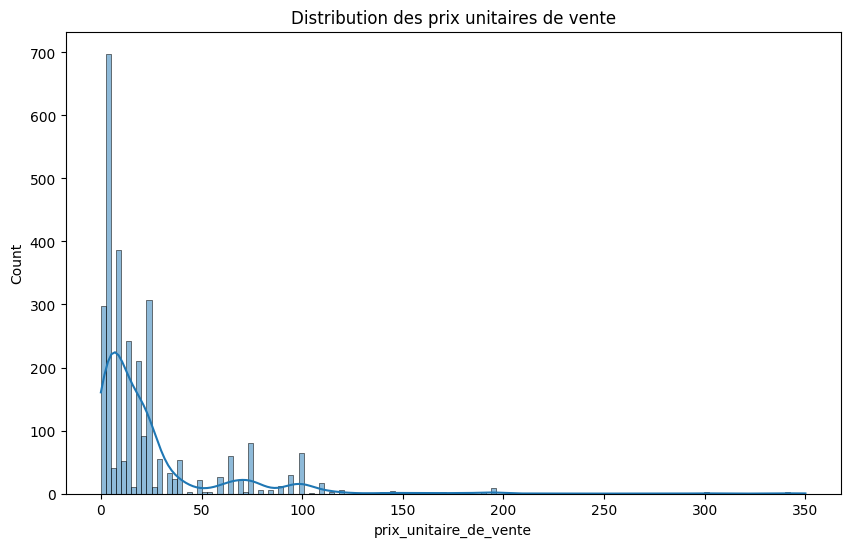

In [145]:
# Visualisation des distributions de variables quantitatives
plt.figure(figsize=(10, 6))
sns.histplot(data['prix_unitaire_de_vente'].astype(float), kde=True)
plt.title('Distribution des prix unitaires de vente')
plt.show()

In [146]:
# Affichage des résultats
print("Valeurs manquantes :\n") 
missing_values

Valeurs manquantes :



code_vente                  0
date_vente                108
nom_de_la_piece             0
quantite                    0
prix_unitaire_de_vente      0
prix_total_de_vente         0
dtype: int64

In [148]:
print("\nStatistiques descriptives :\n")
statistics


Statistiques descriptives :



,code_vente,date_vente,nom_de_la_piece,quantite,prix_unitaire_de_vente,prix_total_de_vente
count,2910,2802,2910,2910.000000,2910.000000,2910.000000
unique,2872,NaN,247,NaN,NaN,NaN
top,17022022/6,NaN,AMORTISSEUR AR CARINA/COROLLA/T.I./CIKUMI,NaN,NaN,NaN
freq,2,NaN,232,NaN,NaN,NaN
mean,NaN,2022-06-28 11:42:31.605995520,NaN,2.889347,22.945808,33.834942
min,NaN,2021-03-01 00:00:00,NaN,1.000000,0.000000,0.000000
25%,NaN,2022-04-02 00:00:00,NaN,1.000000,5.000000,6.000000
50%,NaN,2022-06-30 00:00:00,NaN,1.000000,12.000000,20.000000
75%,NaN,2022-09-28 00:00:00,NaN,2.000000,23.000000,46.000000
max,NaN,2022-12-31 00:00:00,NaN,240.000000,350.000000,870.300000


## Segmentation et analyse des produits

In [149]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)

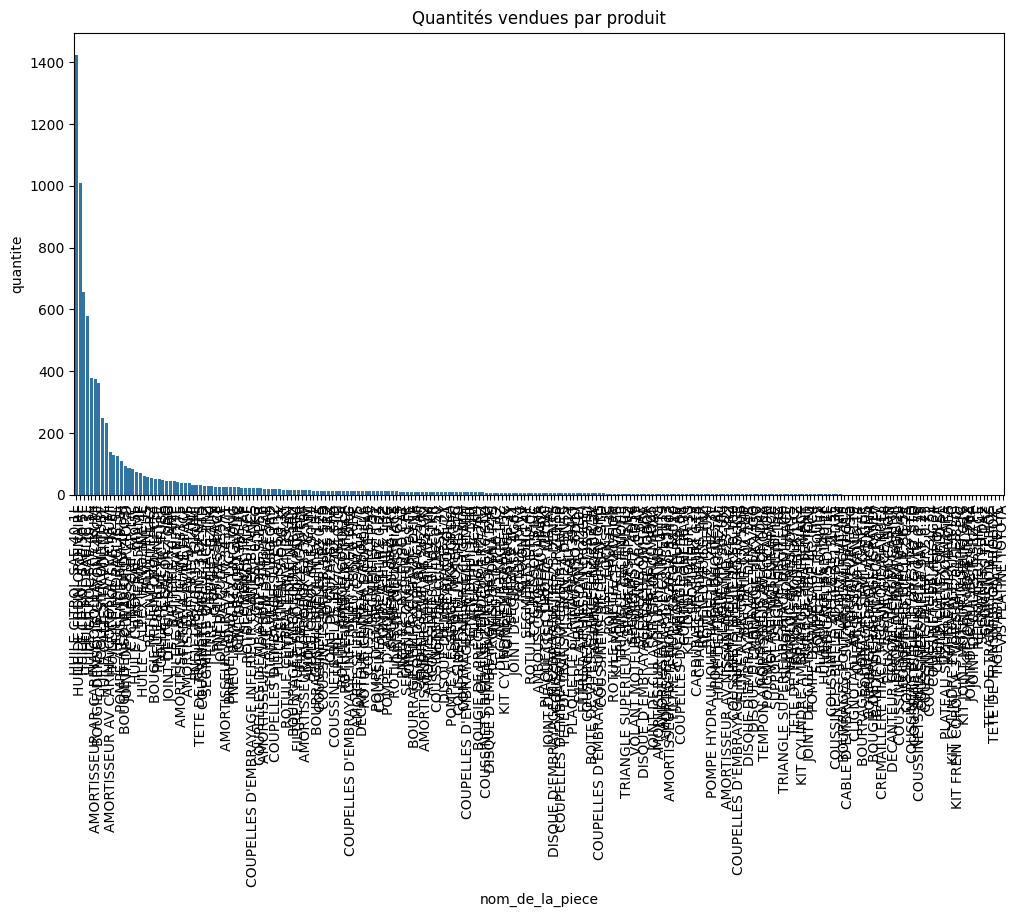

In [150]:
# Visualisation des meilleures ventes
plt.figure(figsize=(12, 6))
sns.barplot(x=segmentation.index, y=segmentation['quantite'])
plt.xticks(rotation=90)
plt.title('Quantités vendues par produit')
plt.show()

## Modelisation prédictive des ventes futures

In [151]:
# Préparation des données pour la régression (encodage des variables catégorielles)
labelencoder = LabelEncoder()
data['nom_de_la_piece'] = labelencoder.fit_transform(data['nom_de_la_piece'])

In [153]:
# Séparation des données en caractéristiques (X) et cible (y)
X = data[['nom_de_la_piece', 'quantite', 'prix_unitaire_de_vente']].astype(float)
y = data['prix_total_de_vente'].astype(float)

In [154]:
# Division des données pour l'entraînement et le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Entraînement du modèle XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
# Prédictions
y_pred = model.predict(X_test)

In [157]:
training_data_prediction = model.predict(X_train)

In [158]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [159]:
print('Valeur R² = ', r2_train)

Valeur R² =  0.9996515851564148


In [160]:
test_data_prediction = model.predict(X_test)

In [161]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [162]:
print('Valeur R² = ', r2_test)

Valeur R² =  0.9963388999179325


## Prédiction des ventes

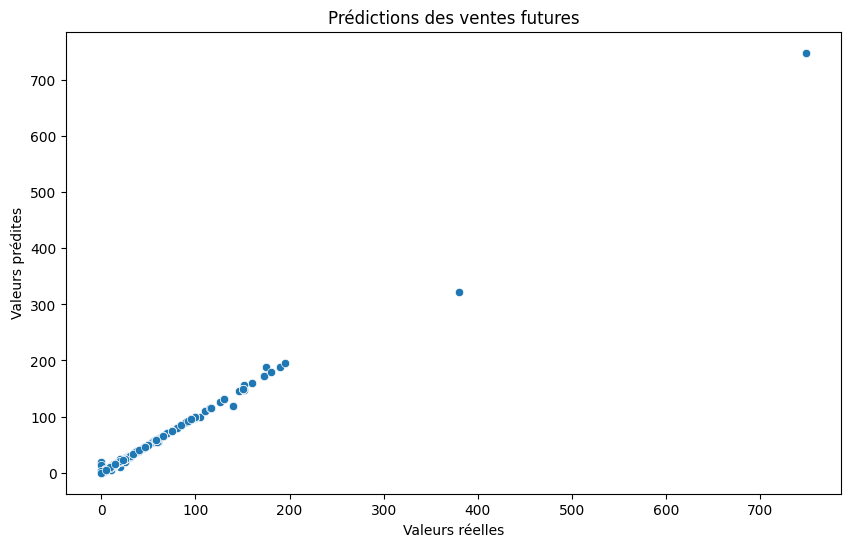

In [163]:
# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions des ventes futures')
plt.show()

In [164]:
# Calcul des métriques d'évaluation
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.4855603554788528


## Interpretation et communication des résultats

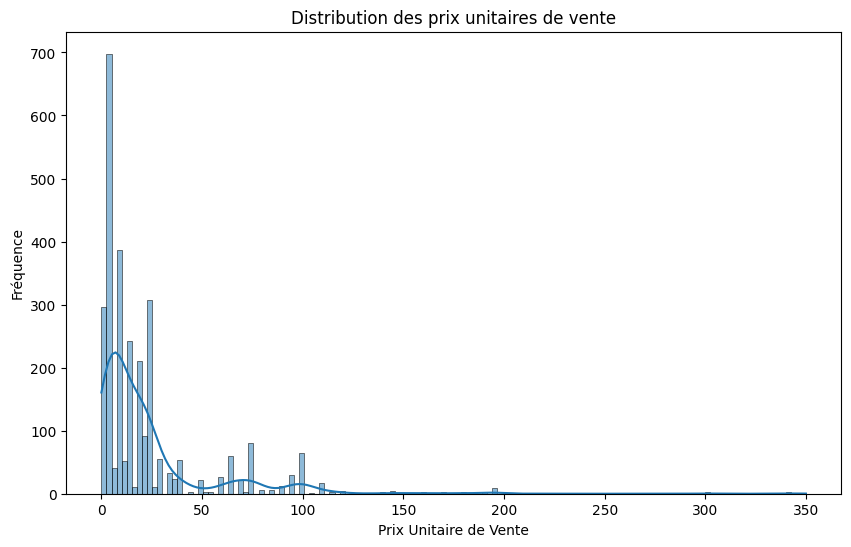

In [165]:
# Distribution des prix unitaire de vente
plt.figure(figsize=(10, 6))
sns.histplot(data['prix_unitaire_de_vente'].astype(float), kde=True)
plt.title('Distribution des prix unitaires de vente')
plt.xlabel('Prix Unitaire de Vente')
plt.ylabel('Fréquence')
plt.show()

In [166]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)

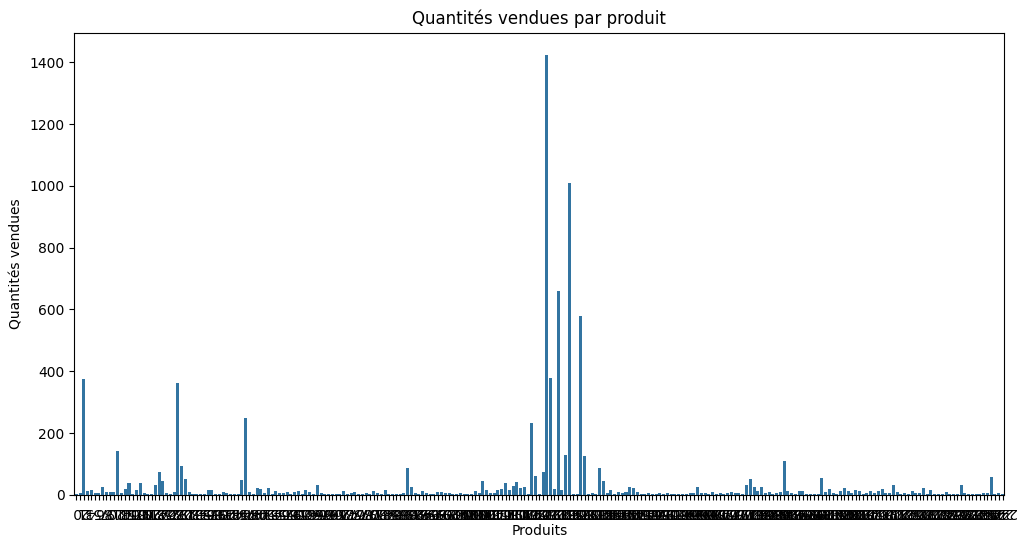

In [167]:
# Visualisation des meilleures ventes
plt.figure(figsize=(12, 6))
sns.barplot(x=segmentation.index, y=segmentation['quantite'])
plt.xticks(rotation=180)
plt.title('Quantités vendues par produit')
plt.xlabel('Produits')
plt.ylabel('Quantités vendues')
plt.show()

In [168]:
# Conversion de 'date_vente' en format datetime
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y')

In [170]:
# Agrégation des ventes par jour
ventes_par_jour = data.groupby('date_vente').agg({'prix_total_de_vente': 'sum'})

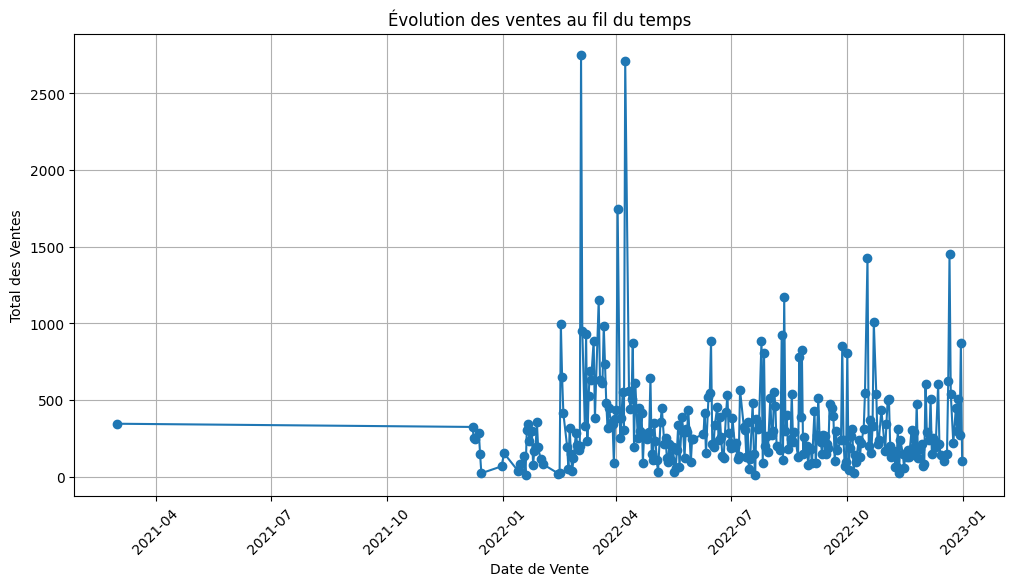

In [171]:
# Visualisation de l'évolution des ventes
plt.figure(figsize=(12, 6))
plt.plot(ventes_par_jour.index, ventes_par_jour['prix_total_de_vente'], marker='o')
plt.title('Évolution des ventes au fil du temps')
plt.xlabel('Date de Vente')
plt.ylabel('Total des Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [172]:
# Segmentation des produits par la quantité vendue
segmentation = data.groupby('nom_de_la_piece').agg({'quantite': 'sum'}).sort_values(by='quantite', ascending=False)

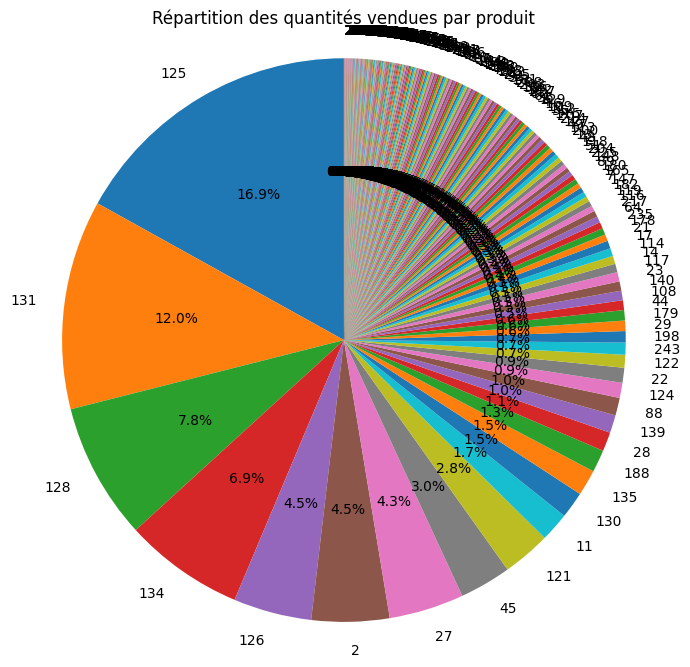

In [173]:
# Visualisation des parts de marché par produit
plt.figure(figsize=(8, 8))
plt.pie(segmentation['quantite'], labels=segmentation.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des quantités vendues par produit')
plt.axis('equal')  # Assure que le graphique est un cercle
plt.show()

In [174]:
# Prédictions des ventes (exemple après modélisation)
y_pred = model.predict(X_test)

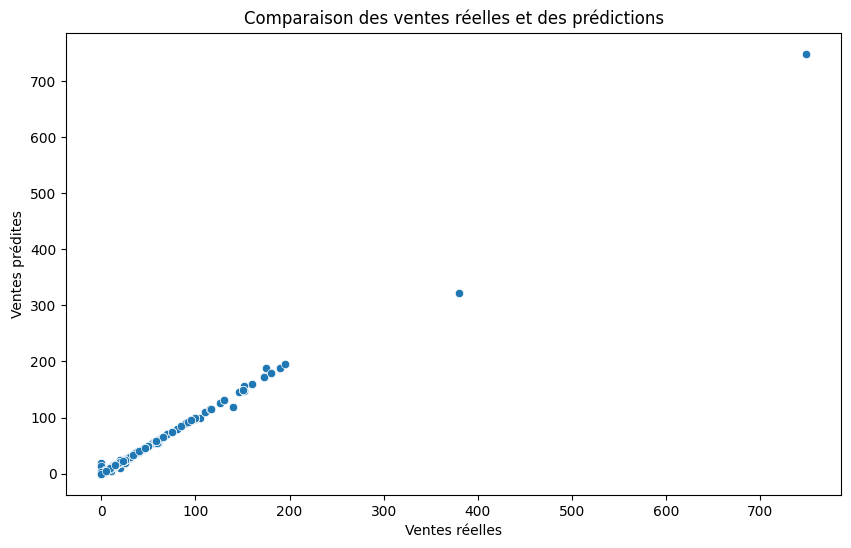

In [175]:
# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Ventes réelles')
plt.ylabel('Ventes prédites')
plt.title('Comparaison des ventes réelles et des prédictions')
plt.show()

In [196]:
# 1. Sélectionner un article spécifique pour prédiction
article = 'HUILE CITROL SAE 50 5L'  # Remplacer par le nom exact de l'article
data_article = data[data['nom_de_la_piece'] == article]

In [197]:
# 2. Convertir la colonne 'date_vente' en format datetime si ce n'est pas déjà fait
data_article['date_vente'] = pd.to_datetime(data_article['date_vente'], format='%d/%m/%Y')

In [198]:
# 3. Organiser les données pour la modélisation en triant par date
data_article = data_article.sort_values(by='date_vente')

In [199]:
# 4. Préparation des variables X et y (ici on prévoit les ventes en fonction de la date)
data_article['date_vente_ordinal'] = data_article['date_vente'].apply(lambda x: x.toordinal())  # Conversion en ordonnée temporelle

In [203]:
XX = data_article[['date_vente_ordinal']]  # La date sous forme numérique
YY = data_article['prix_total_de_vente'].astype(float)  # Les ventes totales

In [205]:
XX

,date_vente_ordinal


In [206]:
YY

Series([], Name: prix_total_de_vente, dtype: float64)

In [204]:
# 5. Séparer les données en entraînement et test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [207]:
# 6. Entraîner le modèle (XGBoost par exemple)
model = XGBRegressor()
model.fit(X_train, y_train)

# 7. Faire des prédictions sur les dates test
y_pred = model.predict(X_test)

# 8. Générer une série de dates futures pour la prédiction
future_dates = pd.date_range(data_article['date_vente'].max(), periods=5)  # Prédire pour les 30 prochains jours
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)

# 9. Faire des prédictions sur les dates futures
future_predictions = model.predict(future_dates_ordinal)

# 10. Visualisation des ventes historiques et prédictions futures
plt.figure(figsize=(12, 6))

# Tracé des ventes historiques
plt.plot(data_article['date_vente'], data_article['prix_total_de_vente'], label='Ventes historiques', marker='o')

# Tracé des prédictions sur les dates futures
plt.plot(future_dates, future_predictions, label='Prédictions futures', marker='x')

plt.xlabel('Date')
plt.ylabel('Ventes Totales')
plt.title(f'Prédiction des Ventes Futures pour {article}')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



ValueError: Neither `start` nor `end` can be NaT

In [208]:
# Cleaning the date_vente column, filling missing dates if needed, and converting it to datetime
data['date_vente'] = data['date_vente'].fillna(method='ffill')  # Fill missing dates with the previous valid date
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y')

C:\Program Files\KMSpico\temp\ipykernel_11480\684681542.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date_vente'] = data['date_vente'].fillna(method='ffill')  # Fill missing dates with the previous valid date


In [209]:
def clean_price(x):
    return float(x.replace(',', '.'))

In [ ]:
data['prix_unitaire_de_vente'] = data['prix_unitaire_de_vente'].apply(clean_price)
data['prix_total_de_vente'] = data['prix_total_de_vente'].apply(clean_price)

In [211]:
data['mois'] = data['date_vente'].dt.month

In [212]:
chiffre_affaire = data['prix_total_de_vente'].sum()
nb_transactions = len(data)

In [213]:
date_debut = data['date_vente'].min()
date_fin = data['date_vente'].max()

In [214]:
chiffre_affaire, nb_transactions, date_debut, date_fin

(np.float64(98459.68),
 2910,
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2022-12-31 00:00:00'))

In [215]:
problematic_dates = data[~data['date_vente'].str.match(r'^\d{2}/\d{2}/\d{4}$', na=False)]

AttributeError: Can only use .str accessor with string values!

In [188]:
# Correcting the problematic dates by filling missing year or invalid dates with plausible ones
# For now, we'll assume "201" meant "2019" and "021" meant "2021"

# Fixing entries with "201" as year
data['date_vente'] = data['date_vente'].replace({'12/16/201': '16/12/2019', '30/12/021': '30/12/2021'})

# Now converting the date to the correct format
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

# Recheck for any remaining NaT values in date_vente column
missing_dates = data[data['date_vente'].isna()]

In [189]:
data = data.dropna(subset=['date_vente'])

In [190]:
data.head(), data.dtypes

(   code_vente date_vente  nom_de_la_piece  quantite  prix_unitaire_de_vente  \
 0  08122021/1 2021-12-08              128         6                    8.67   
 1  08122021/2 2021-12-08               21         1                   60.00   
 2  08122021/3 2021-12-08               68         1                   15.00   
 3  08122021/4 2021-12-08              200         1                    5.00   
 4  08122021/5 2021-12-08              128         6                    8.67   
 
    prix_total_de_vente  mois  
 0                52.02    12  
 1                60.00    12  
 2                15.00    12  
 3                 5.00    12  
 4                52.02    12  ,
 code_vente                        object
 date_vente                datetime64[ns]
 nom_de_la_piece                    int64
 quantite                           int64
 prix_unitaire_de_vente           float64
 prix_total_de_vente              float64
 mois                               int32
 dtype: object)

In [191]:
data['date_vente'] = data['date_vente'].replace({'12/16/201': '16/12/2019', '30/12/021': '30/12/2021'})


In [192]:
data['date_vente'] = pd.to_datetime(data['date_vente'], format='%d/%m/%Y', errors='coerce')

In [193]:
data = data.dropna(subset=['date_vente'])

C:\Program Files\KMSpico\temp\ipykernel_11480\3921679566.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('date_vente').resample('M').sum()['prix_total_de_vente'].plot(figsize=(10,6))


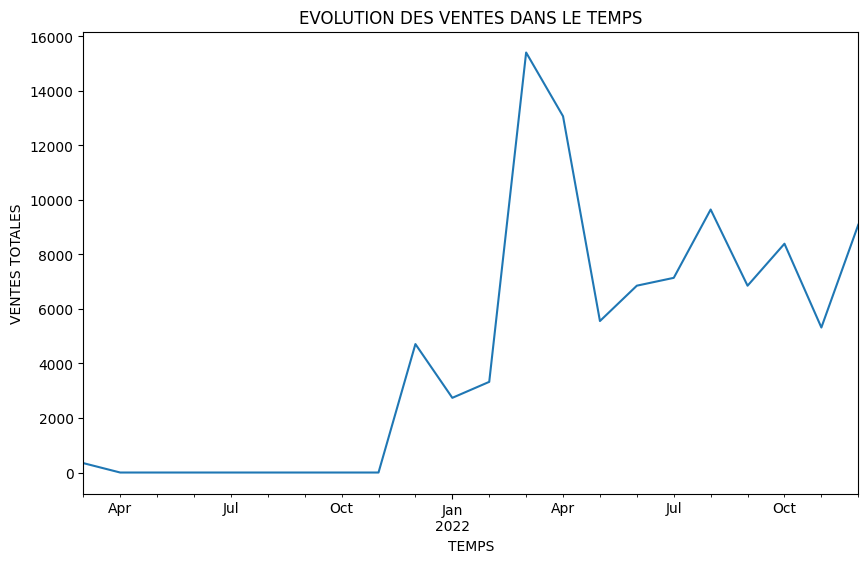

In [216]:
data.set_index('date_vente').resample('M').sum()['prix_total_de_vente'].plot(figsize=(10,6))
plt.title('EVOLUTION DES VENTES DANS LE TEMPS')
plt.xlabel('TEMPS')
plt.ylabel('VENTES TOTALES')
plt.show()

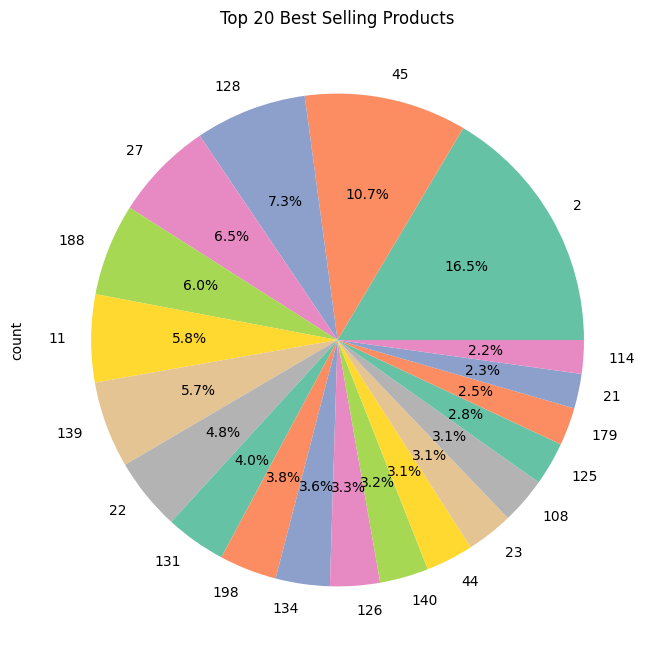

In [195]:
top_products = data['nom_de_la_piece'].value_counts().head(20)
top_products.plot.pie(autopct='%1.1f%%', figsize=(8,8), colors=sns.color_palette('Set2'))
plt.title('Top 20 Best Selling Products')
plt.show()